# Loan Stats

## Data Preprocessing

In [444]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# importing dataset and forcing the dataset to show all the variables as 
# it will not show otherwise since the number of columns are quite large
df = pd.read_csv('E:\\datasets\\LoanStats\\LoanStats3a.csv')
df.info(verbose = True, null_counts = True)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Data columns (total 145 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          3 non-null      object 
 1   member_id                                   0 non-null      float64
 2   loan_amnt                                   42535 non-null  float64
 3   funded_amnt                                 42535 non-null  float64
 4   funded_amnt_inv                             42535 non-null  float64
 5   term                                        42535 non-null  object 
 6   int_rate                                    42535 non-null  object 
 7   installment                                 42535 non-null  float64
 8   grade                                       42535 non-null  object 
 9   sub_grade                                   42535 non-null  object 
 10  emp_title

In [445]:
# intializing the coldrop list to store the name of columns which are to be dropped
coldrop = []
for i, col in enumerate(df.columns):
    # append only those columns which have more 40000 nan values or 
    # if they have only less than two unique value i.e nan and the other value
    if len(df[df[col].isnull()]) >= 40000 or len(df[col].unique()) <= 2:
        coldrop.append(col)        
coldrop

['id',
 'member_id',
 'pymnt_plan',
 'url',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_ac

In [446]:
# dropping the columns specified by coldrop list
df = df.drop(coldrop, axis = 1)
# dropping the rows in which all columns are null
df = df.dropna(how = 'all', axis = 0)
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens',
       'debt_settlement_flag'],
      dtype='object')

In [447]:
# checking the unique values in employee title
df.emp_title.value_counts() 
# Length = 30658; too many unique values so it needs to be dropped so that the model may not overfit

US Army                                   139
Bank of America                           115
IBM                                        72
Kaiser Permanente                          61
AT&T                                       61
                                         ... 
JAGUAR LABOR CONTRACTING INC                1
Saginaw Control and Engineering             1
Anderson School District 5/ T.L. Hanna      1
Lewis Property Management CO                1
Social Security Board                       1
Name: emp_title, Length: 30658, dtype: int64

In [448]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens',
       'debt_settlement_flag'],
      dtype='object')

In [449]:
df.purpose.value_counts(), df.title.value_counts() 
# both serve the similar purpose so title can be removed since it has more unique values
# length of title = 21256

(debt_consolidation    19776
 credit_card            5477
 other                  4425
 home_improvement       3199
 major_purchase         2311
 small_business         1992
 car                    1615
 wedding                1004
 medical                 753
 moving                  629
 house                   426
 educational             422
 vacation                400
 renewable_energy        106
 Name: purpose, dtype: int64,
 Debt Consolidation                     2259
 Debt Consolidation Loan                1760
 Personal Loan                           708
 Consolidation                           547
 debt consolidation                      532
                                        ... 
 IVF Cycle                                 1
 Pay off CC's & build new patio area       1
 A new beginning                           1
 Patent Purchase                           1
 Continuing School                         1
 Name: title, Length: 21256, dtype: int64)

In [450]:
df.zip_code, df.addr_state 
# since the state belongs to the higher hierarchy of zip code and has lesser unique values so df.zip_code can be dropped

(0        860xx
 1        309xx
 2        606xx
 3        917xx
 4        972xx
          ...  
 42533    100xx
 42534    021xx
 42535    100xx
 42536    100xx
 42537    068xx
 Name: zip_code, Length: 42535, dtype: object,
 0        AZ
 1        GA
 2        IL
 3        CA
 4        OR
          ..
 42533    NY
 42534    MA
 42535    NY
 42536    NY
 42537    CT
 Name: addr_state, Length: 42535, dtype: object)

In [451]:
# visualizing corrrelation between variables
df.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
loan_amnt,1.000000,0.981746,0.929600,0.930869,0.276122,0.065112,-0.032767,-0.030314,0.022833,0.033717,...,0.850882,0.729111,0.043398,0.133074,0.072920,0.447702,-0.005777,-0.003974,-0.037557,-0.005963
funded_amnt,0.981746,1.000000,0.947527,0.956522,0.272067,0.064821,-0.033421,-0.030048,0.024098,0.025119,...,0.868776,0.736391,0.045791,0.134164,0.075035,0.452262,-0.005627,-0.003938,-0.038855,-0.006001
funded_amnt_inv,0.929600,0.947527,1.000000,0.890151,0.252329,0.071073,-0.043868,-0.074913,0.104707,0.488968,...,0.841547,0.726552,0.020079,0.115692,0.055754,0.441508,-0.012590,-0.006201,-0.046124,-0.006242
installment,0.930869,0.956522,0.890151,1.000000,0.278339,0.054948,-0.020096,-0.010882,0.003996,-0.042947,...,0.843359,0.633615,0.057244,0.117829,0.076223,0.400162,-0.004109,-0.003495,-0.033746,-0.005929
annual_inc,0.276122,0.272067,0.252329,0.278339,1.000000,-0.116559,0.022161,0.027764,-0.000751,-0.002071,...,0.259516,0.187831,0.009743,0.025307,0.017191,0.139387,-0.000926,-0.001809,-0.015437,-0.001828
dti,0.065112,0.064821,0.071073,0.054948,-0.116559,1.000000,-0.036577,0.014241,0.066960,0.129753,...,0.041432,0.104547,-0.010959,0.022600,0.008587,0.003743,-0.013132,-0.009262,0.008671,-0.003346
delinq_2yrs,-0.032767,-0.033421,-0.043868,-0.020096,0.022161,-0.036577,1.000000,0.020872,-0.525531,-0.057269,...,-0.038992,0.020130,0.034574,0.012130,0.013637,-0.013937,0.072845,0.121651,0.004708,-0.001452
inq_last_6mths,-0.030314,-0.030048,-0.074913,-0.010882,0.027764,0.014241,0.020872,1.000000,-0.046555,-0.172404,...,-0.070444,-0.012826,0.061024,0.035907,0.035611,-0.007532,0.002658,0.015604,0.047311,0.022088
mths_since_last_delinq,0.022833,0.024098,0.104707,0.003996,-0.000751,0.066960,-0.525531,-0.046555,1.000000,0.484924,...,0.030625,0.016429,-0.034576,-0.006925,-0.013082,0.019998,-0.024295,-0.012199,0.018826,-0.012604
mths_since_last_record,0.033717,0.025119,0.488968,-0.042947,-0.002071,0.129753,-0.057269,-0.172404,0.484924,1.000000,...,0.023001,0.153132,-0.113309,-0.016713,-0.032637,0.106484,-0.035999,-0.020779,0.821834,0.020230


In [452]:
# dropping all columns which are multicollinear; having variables with each other relating more than 70%
# dropping the columns which were discussed above for e.g, title, emp_title and zip_code
df = df.drop(columns = ['funded_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt', 'total_pymnt_inv',
                        'total_rec_prncp', 'total_rec_int', 'pub_rec', 'desc', 'delinq_amnt', 'tax_liens',
                        'pub_rec_bankruptcies', 'collection_recovery_fee', 'last_pymnt_d', 'title', 'emp_title', 'zip_code'],
             axis = 1)
# checking the number of columns in the dataset
len(df.columns)

30

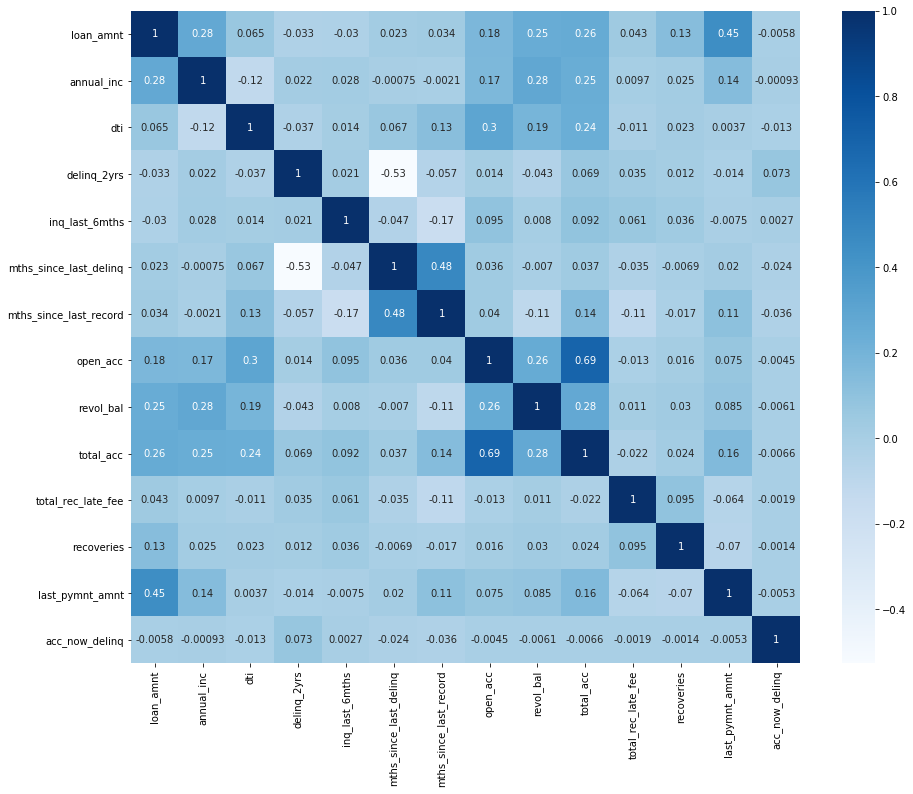

In [453]:
# visualizing the heatmap
plt.figure(figsize = (15, 12))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)

In [454]:
# filling all nan values with mode (most occuring value), can be used for both categorical and numerical data
df = df.fillna(df.mode().iloc[0])

In [455]:
# The loan_status had 4 unique values but could be reduced to 2 since 'does not meet credit policy could be removed'
df.loan_status = df.loan_status.apply(lambda x: 'Fully Paid' if (x == 'Does not meet the credit policy. Status:Fully Paid' 
                                                   or x == 'Fully Paid')  else 'Charged Off')
# stripping % sign from both revol_util and interest_rate
df.revol_util = df.revol_util.apply(lambda x: x.strip('%'))
df.int_rate = df.int_rate.apply(lambda x: x.strip('%'))
# if emp_length is greater than 10 years replace it with 11 years and if less than 1 then replace it with 0
df.emp_length = df.emp_length.apply(lambda x: '11 years' if x == '10+ years' else x)
df.emp_length = df.emp_length.apply(lambda x: '0 years' if x == '< 1 year' else x)
# replacing NONE with OTHER due to redundancy 
df.home_ownership = df.home_ownership.apply(lambda x: 'OTHER' if x == 'NONE' else x)
# only storing the numerical value in years in emp_length; removing the 'years' string
df.emp_length = df.emp_length.apply(lambda x: str(x).split(' ')[0])
# only considering the year of issuing date of loan and the rest
df.issue_d = df.issue_d.apply(lambda x: str(x).split('-')[1])
df.earliest_cr_line = df.earliest_cr_line.apply(lambda x: str(x).split('-')[1])
df.next_pymnt_d = df.next_pymnt_d.apply(lambda x: str(x).split('-')[1])
df.last_credit_pull_d = df.last_credit_pull_d.apply(lambda x: str(x).split('-')[1])

In [456]:
# changing the type of columns of the dataframe
df.int_rate = df.int_rate.astype('float')
df.emp_length = df.emp_length.astype('int')
df.revol_util = df.revol_util.astype('float')

In [457]:
# inspecting the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42535 entries, 0 to 42537
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               42535 non-null  float64
 1   term                    42535 non-null  object 
 2   int_rate                42535 non-null  float64
 3   grade                   42535 non-null  object 
 4   sub_grade               42535 non-null  object 
 5   emp_length              42535 non-null  int32  
 6   home_ownership          42535 non-null  object 
 7   annual_inc              42535 non-null  float64
 8   verification_status     42535 non-null  object 
 9   issue_d                 42535 non-null  object 
 10  loan_status             42535 non-null  object 
 11  purpose                 42535 non-null  object 
 12  addr_state              42535 non-null  object 
 13  dti                     42535 non-null  float64
 14  delinq_2yrs             42535 non-null

## Data Exploration

Text(0, 0.5, 'Frequency')

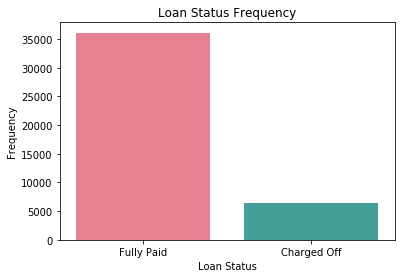

In [459]:
# creating a count plot 
sns.countplot(x = 'loan_status', data = df, palette = 'husl')
plt.xlabel('Loan Status')
plt.title('Loan Status Frequency')
plt.ylabel('Frequency')
# the graph shows the imbalance between the classes

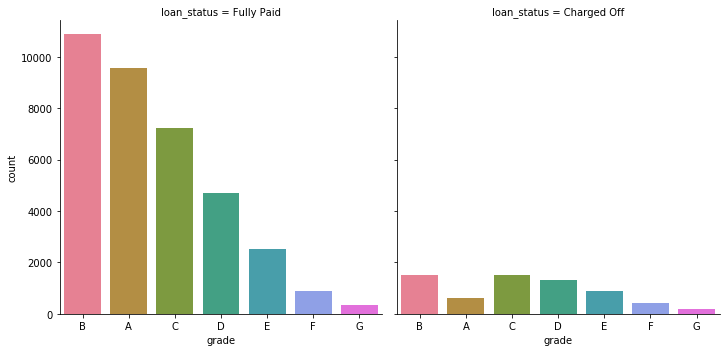

In [460]:
# creating a count plot with different graphs for both classes of loan_status
sns.catplot(x = 'grade', data = df, palette = 'husl', col = 'loan_status', 
            kind = 'count', order = df.grade.value_counts().index)
# the plot tells us that the loans with B category tend to have highest count of being fully paid
# the Grade C loan has a highest count of being charged off

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text xticklabel objects>)

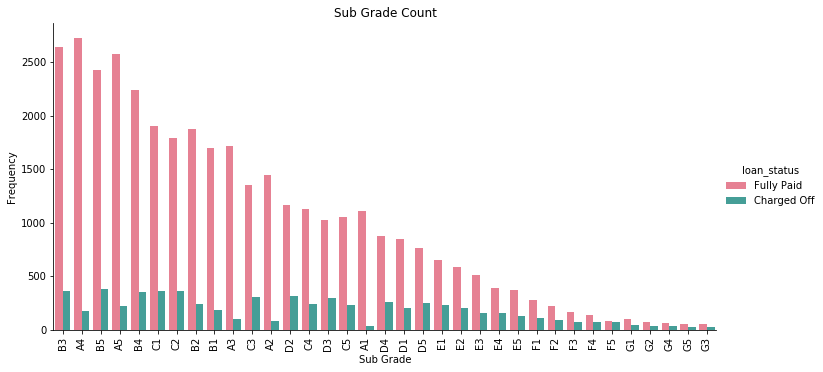

In [461]:
sns.catplot(x = 'sub_grade', data = df, palette = 'husl', hue = 'loan_status', 
            kind = 'count', order = df.sub_grade.value_counts().index, height=5, aspect=2)
plt.xlabel('Sub Grade')
plt.ylabel('Frequency')
plt.title('Sub Grade Count')
plt.xticks(rotation = 90)
# the sub grade graph validates our previous assumptions of how grades affect loan status

Text(0.5, 1, 'Distribution of Loan Amount with Status')

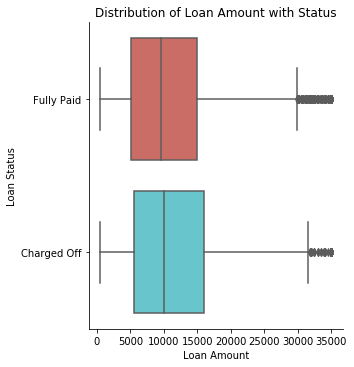

In [462]:
sns.catplot(x = 'loan_amnt', data = df, y = 'loan_status', kind = 'box', palette = 'hls')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distribution of Loan Amount with Status')


Text(0.5, 1, 'Distribution of Interest Rates with Loan Status')

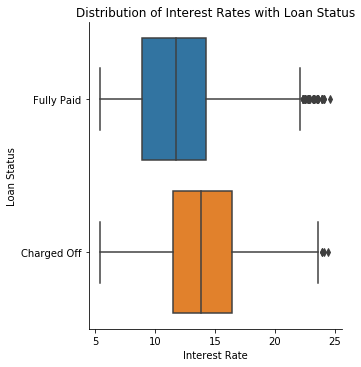

In [463]:
sns.catplot(x = 'int_rate', y = 'loan_status', data = df, kind = 'box')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
plt.title('Distribution of Interest Rates with Loan Status')
# the 75% interest rates of charged off loan tend to be lesser than 16.5% 
# the 75% of the interest rates of fully paid tend to be lesser than 15% 

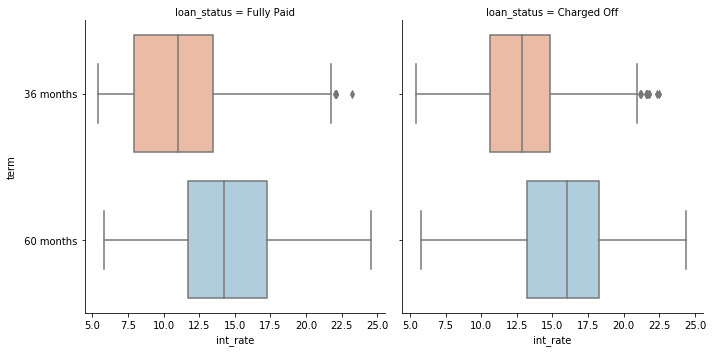

In [464]:
sns.catplot(x = 'int_rate', col = 'loan_status', data = df, kind = 'box', y = 'term', palette = 'RdBu')
# this plot tells us that usually if the term is 3 years then interest rates are tend to be lower than 5 years

Text(0.5, 1.0, 'Home Ownership Vs. Annual Income')

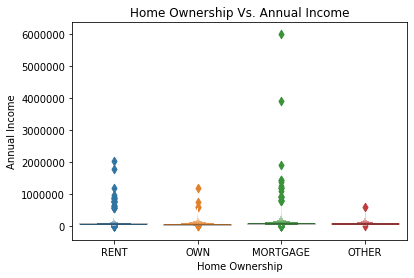

In [465]:
# this plot discusses that usually people with very higher income have homes on mortgage or on rent 
# usually the richer people tend to have more own homes but these results are quite interesting and can be a topic of discussion 
# as higher income could be potentially outlier
sns.boxenplot(y = 'annual_inc', x = 'home_ownership', data = df)
plt.xlabel('Home Ownership')
plt.ylabel('Annual Income')
plt.title('Home Ownership Vs. Annual Income')

Text(0.5, 1, 'Distribution of DTI wrt Loan Status')

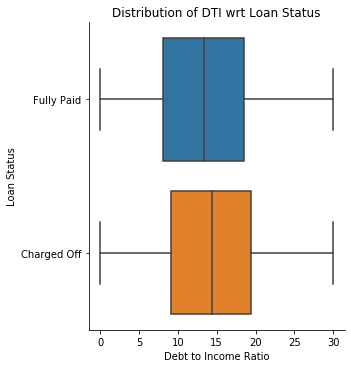

In [466]:
sns.catplot(x = 'dti', y = 'loan_status', kind = 'box', data = df)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Loan Status')
plt.title('Distribution of DTI wrt Loan Status')
# in case of fully paid loans usually 75% of the dti are less than equal to 18 
# in case of charged off loans usually 75% of the dti are less than equal to 19

Text(0.5, 1.0, 'Verification Status Frequency')

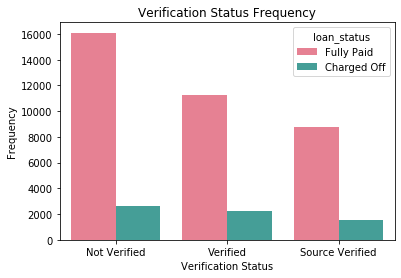

In [467]:
sns.countplot(x = 'verification_status', data = df, hue = 'loan_status', palette = 'husl', 
              order = df.verification_status.value_counts().index)
plt.xlabel('Verification Status')
plt.ylabel('Frequency')
plt.title('Verification Status Frequency')
# plots the count plot verification status with loan_status and ordering the counts in descending order

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

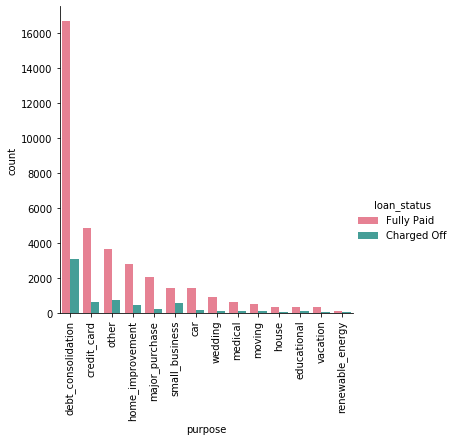

In [468]:
sns.catplot(x = 'purpose', data = df, hue = 'loan_status', palette = 'husl', 
              order = df.purpose.value_counts().index, kind = 'count')
plt.xticks(rotation = 90)
# comparing the purpose of loan with the loan status

Text(0.5, 1, 'Loan Statuses for Top 10 States ')

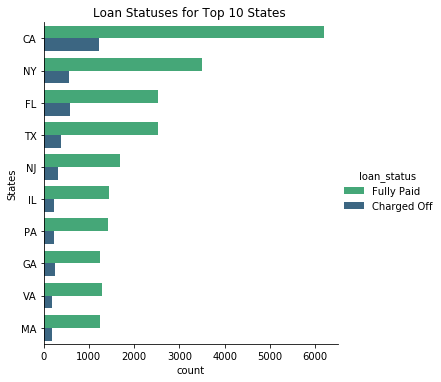

In [469]:
sns.catplot(y = 'addr_state', hue = 'loan_status', data = df, 
              order = df.addr_state.value_counts().iloc[:10].index, palette = 'viridis_r', kind = 'count')
plt.ylabel('States')
plt.title('Loan Statuses for Top 10 States ')
# this plot shows that most of the loans (6000+) fully paid are from the state of California
# california people also tend to charged off the loans the most

Text(0.5, 1, 'Loan Status for Recoveries')

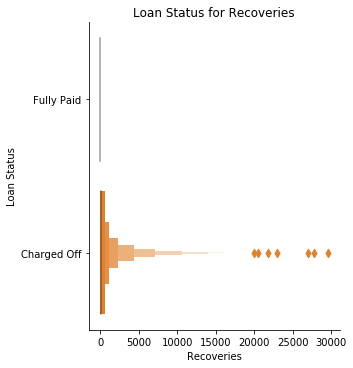

In [470]:
sns.catplot(x = 'recoveries', kind = 'boxen', data = df, y = 'loan_status')
plt.ylabel('Loan Status')
plt.xlabel('Recoveries')
plt.title('Loan Status for Recoveries')
# this plot tells us that all loans that are fully paid have 0 recoveries
# loans which are charged off usually have recoveries

Text(0.5, 1, 'Loan Status for Last Payment Amount')

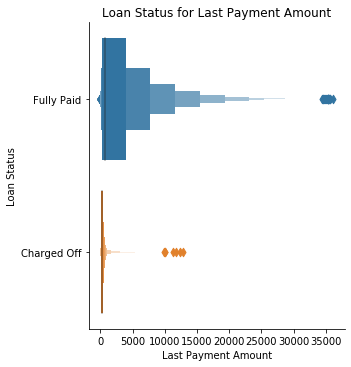

In [471]:
sns.catplot(x = 'last_pymnt_amnt', data = df, kind = 'boxen', y = 'loan_status')
plt.xlabel('Last Payment Amount')
plt.ylabel('Loan Status')
plt.title('Loan Status for Last Payment Amount')
# this plot states that if the last paid amount for the loan is varies upto 35000, 
# there is a significant chance that the loan is fully paid

Text(0.5, 1, 'Delinquency wrt Loan Status')

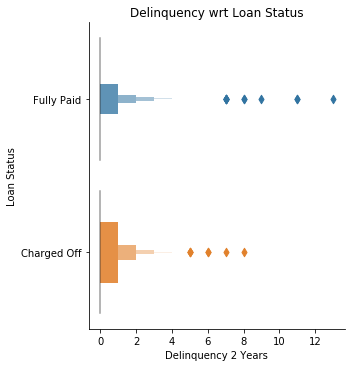

In [473]:
sns.catplot(x = 'delinq_2yrs', data = df, kind = 'boxen', y = 'loan_status')
plt.xlabel('Delinquency 2 Years')
plt.ylabel('Loan Status')
plt.title('Delinquency wrt Loan Status')
# delinquency = borrower misses a payment on a loan

## Model Prediction

In [474]:
# importing all the libraries for fitting and predicting the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report

In [495]:
# specifying X and y
X = df.drop('loan_status', axis = 1)
y = df.loan_status

In [496]:
# dealing with categorical variables in X 
X = pd.get_dummies(X)

In [477]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = df.loan_status)

In [478]:
# creating pipelines
# each pipeline will first standardize the data so that all the data are on same scale and then perform fitting the model
pipelines = {
    'l2' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l2' , random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))}

In [479]:
# intializing the parameters for all of the Classifiers
l2_hyperparameters = {'logisticregression__C' : np.linspace(1e-3, 1e3, 10),}

# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [20, 40],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.5],
    'randomforestclassifier__min_samples_leaf': [1,3]
}
#Gradient Boosting hyperparameters
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [20, 40],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2, 0.3],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

In [480]:
# setting the hyperparameters for the models
hyperparameters = {
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

In [491]:
fitted_models = {}
algs_to_test = ['l2', 'rf', 'gb']

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=5, n_jobs=-1)
    
    # Fit model on X_train, y_train
    if name in algs_to_test:
        model.fit(X_train, y_train)
        fitted_models[name] = model
        print(name, 'has been fitted.')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


l2 has been fitted.
rf has been fitted.
gb has been fitted.


In [492]:
# checking which model performed the best
for name, model in fitted_models.items():
    print( name, model.best_score_ )

l2 0.9752672565374269
rf 0.998808828525651
gb 0.9987147816903269


In [493]:
# since Random Forest had the highest accuracy, using that for predicting the y_test and printing confusion matrix
pred_rf = fitted_models['rf'].predict(X_test)
confusion_matrix(y_test, pred_rf)

array([[1602,    6],
       [   2, 9024]], dtype=int64)

In [494]:
# checking whether how much of the true negatives were predicted as false positive by the model
# checking whether how much of the true positives were predicted as false negative by the model 
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

 Charged Off       1.00      1.00      1.00      1608
  Fully Paid       1.00      1.00      1.00      9026

    accuracy                           1.00     10634
   macro avg       1.00      1.00      1.00     10634
weighted avg       1.00      1.00      1.00     10634

